In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
ds = pd.read_csv('./train.csv')
# print(ds)
print(ds.shape)

data = ds.values
print(data.shape)

(42000, 785)
(42000, 785)


[1 0 1 ... 7 6 9]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
8


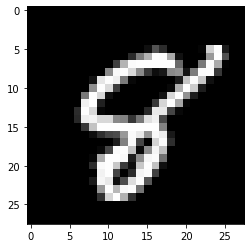

In [18]:
y_train = data[:,0]
x_train = data[:,1:]

print(y_train)
print(x_train)

plt.figure(0)
idx = 1204
print(y_train[idx])
plt.imshow(x_train[idx].reshape((28,28)),cmap='gray')

In [22]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(X_train,query_point,y_train,k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [dist(query_point,X_train[ix,:]),y_train[ix]]
        #vals is a list containing distance and their labels
        vals.append(v)
        
    updated_vals = sorted(vals, key=lambda x: x[0])
    
    #let us pick up top k values 
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:,1],return_counts = True)
#     print(pred_arr)
    index = pred_arr[1].argmax()
    return pred_arr, pred_arr[0][index]

((array([3., 5., 9.]), array([2, 1, 4], dtype=int64)), 9.0)
9


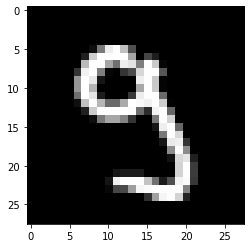

In [34]:
idq = int(np.random.random() * x_train.shape[0])
q = x_train[idq]

res = knn(x_train[:10000],q,y_train[:10000], k=7)
print(res)
print(y_train[idq])

plt.figure(0)
plt.imshow(q.reshape((28, 28)), cmap='gray')
plt.show()